### Import Libraries

In [27]:
import pandas as pd
import io
import seaborn as sns
import requests
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

In [68]:
url ='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
s= requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [12]:
df.head(6)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922,44.24,43.25,1.850


### The feature with missing values falls under what category? What missing value imputation technique would you use?

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [11]:
df.to_csv('fuel_data.csv', index= False)

### Which of the following fuel type code has the lowest average fuel cost per unit burned?

In [82]:
 df.groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].mean()

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

### Which year has the highest average fuel cost per unit delivered?

In [77]:
 df.groupby(['report_year'])['fuel_cost_per_unit_delivered'].mean()

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64

### What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [14]:
df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


### What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

In [79]:
df['fuel_qty_burned'].kurt()

651.3694501337732

In [17]:
df['fuel_qty_burned'].skew()

15.851495469109503

### Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?

In [18]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [22]:
df['fuel_unit'].shape

(29523,)

In [45]:
percentage_null = (df['fuel_unit'].isnull().sum()/df['fuel_unit'].shape)*100
percentage_null

array([0.60969414])

### Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

<AxesSubplot:>

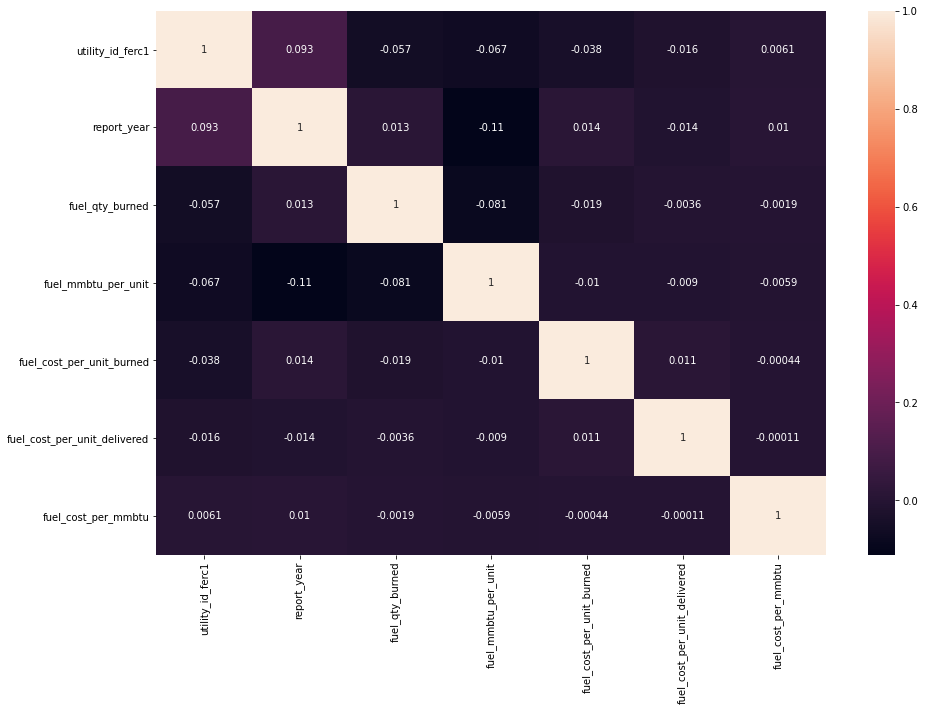

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

### For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?



In [74]:
coal_94 = df.loc[(df['fuel_type_code_pudl'] == 'coal') & (df['report_year'] == 1994)].sum()
coal_94= coal_94['fuel_cost_per_unit_burned']
coal_94

14984.572

In [73]:
coal_98 = df.loc[(df['fuel_type_code_pudl'] == 'coal') & (df['report_year'] == 1998)].sum()
coal_98 = coal_98['fuel_cost_per_unit_burned']
coal_98



11902.597

In [75]:
percentage_change = ((coal_98-coal_94)/(coal_98+coal_94)) *100
percentage_change

-11.462623677487207